<h1 style="background-color:black;color:white;border-radius: 8px; padding:12px; text-align: center;">Binary Classification of Machine Failures</h1>

<a id='table_of_contents'></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Table of Contents</h2>

1. <a href="#import" style="text-decoration: None">Import Libraries and Dataset</a>
2. <a href="#data_preview" style="text-decoration: None">Dataset Preview</a>
3. <a href="#data_wrangling" style="text-decoration: None">Data Wrangling</a>
4. <a href="#eda" style="text-decoration: None">Exploratory Data Analysis</a>
    - <a href="#univariate" style="text-decoration: None">Univariate Analysis</a>
    - <a href="#bivariate" style="text-decoration: None">Bivariate Analysis</a>
5. <a href="#data_preprocessing" style="text-decoration: None">Data Preparation and Preprocessing Steps</a>
    - <a href="#ordinal_encoding" style="text-decoration: None">Ordinal Encoding</a>
    - <a href="#scale_numeric" style="text-decoration: None">Scale Numeric Columns</a>
    - <a href="#split_data" style="text-decoration: None">Split Data into Training and Validation Set</a>
6. <a href="#baseline" style="text-decoration: None">Baseline Models</a>
    - <a href="#evaluation_metrics" style="text-decoration: None">Define Model Evaluation Metrics</a>
    - <a href="#class_imbalance" style="text-decoration: None">Handling Class Imbalance</a>
    - <a href="#gbm_xgb_cat" style="text-decoration: None">LightGBM, XGBoost and CatBoost</a>
    - <a href="#base_models" style="text-decoration: None">Performance Comparison of base modelsPerformance Comparison of base models</a>
7. <a href="#optimization" style="text-decoration: None">Optimization: Hyperparameter Tuning</a>
8. <a href="#performance_summary" style="text-decoration: None">Performance Comparison and Summary</a>
9. <a href="#save_model" style="text-decoration: None">Save Model</a>

<a id="import"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">1. Import Libraries and Dataset</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uncomment the line below if you are working outside of Kaggle
# df = pd.read_csv('playground-series-s3e17/train.csv')

# Comment the following lines of code if you are working outside of Kaggle
try:
    df = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv')
    test_df = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')
    submission_df = pd.read_csv('/kaggle/input/playground-series-s3e17/sample_submission.csv')
except:
    df = pd.read_csv('playground-series-s3e17/train.csv')
    test_df = pd.read_csv('playground-series-s3e17/test.csv')
    submission_df = pd.read_csv('playground-series-s3e17/sample_submission.csv')

<a id="data_preview"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3. Dataset Preview</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [3]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
df.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

In [6]:
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="data_wrangling"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4. Data Wrangling Steps</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

Drop <code>UDI</code> and <code>Product ID</code> columns

In [7]:
# df = df.drop(columns=['UDI', 'Product ID'], axis=1)
df = df.drop(columns=['id', 'Product ID'], axis=1)
test_df = test_df.drop(columns=['id', 'Product ID'], axis=1)

<a id="eda"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5. Exploratory Data Analysis</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_style("darkgrid")

In [9]:
def custom_show(fig):
    fig.update_layout(title_x=0.5, title_y=0.9)
    fig.show('svg', width=1000, height=550)

In [10]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

<a id="univariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.1. Univariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [11]:
!pip install -U kaleido

In [12]:
machines = df['Machine failure'].value_counts()

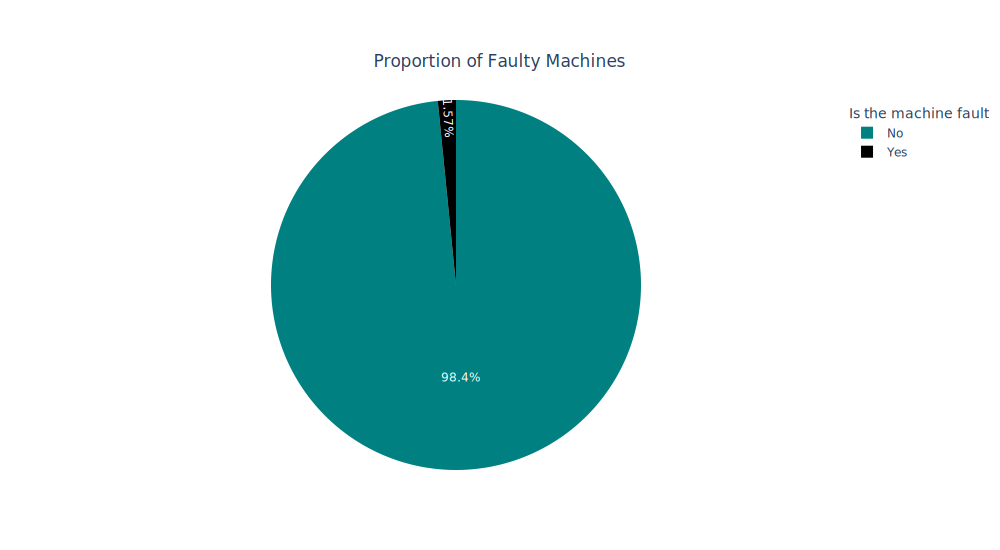

In [13]:
fig = px.pie(
    machines, values=machines.values, names=['No', 'Yes'],
    title='Proportion of Faulty Machines',
    color_discrete_sequence=plot_color,
)

fig.update_layout(legend_title_text='Is the machine faulty?', title_x=0.3, title_y=0.95,)
custom_show(fig)

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.2. Bivariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [14]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### `Air temperature [K]`

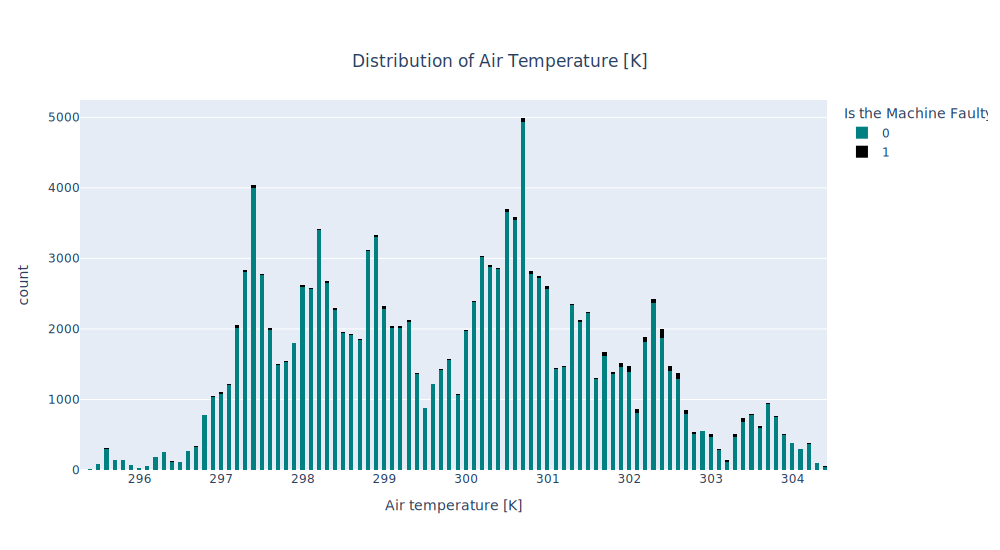

In [15]:
title = 'Distribution of Air Temperature [K]'
fig = px.histogram(df, x='Air temperature [K]', color='Machine failure', title=title, color_discrete_sequence=plot_color)
fig.update_layout(title_x=0.5, title_y=0.9, legend_title='Is the Machine Faulty?')
custom_show(fig)

### `Process temperature [K]`

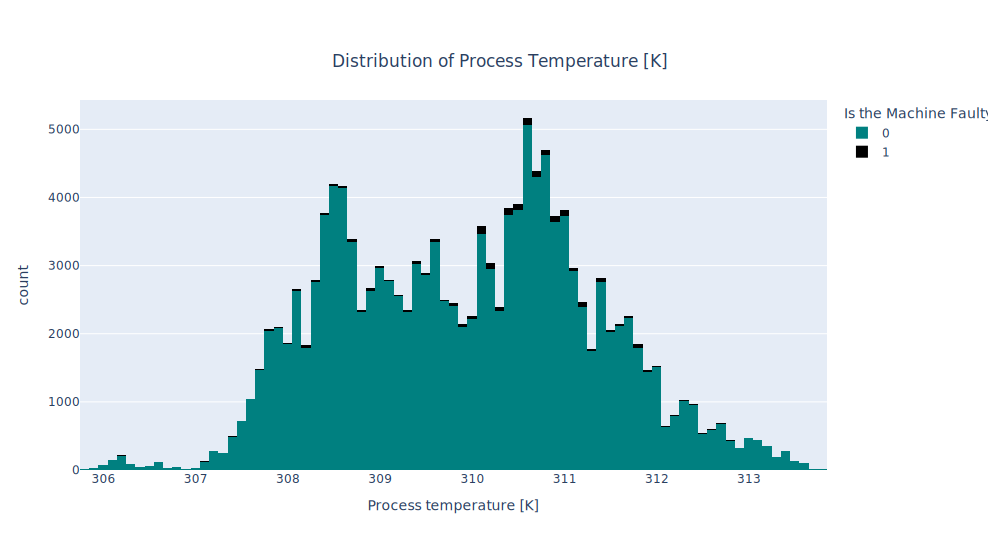

In [16]:
title = 'Distribution of Process Temperature [K]'
fig = px.histogram(df, x='Process temperature [K]', color='Machine failure', title=title, color_discrete_sequence=plot_color)
fig.update_layout(title_x=0.5, title_y=0.9, legend_title='Is the Machine Faulty?')
custom_show(fig)

### Outliers

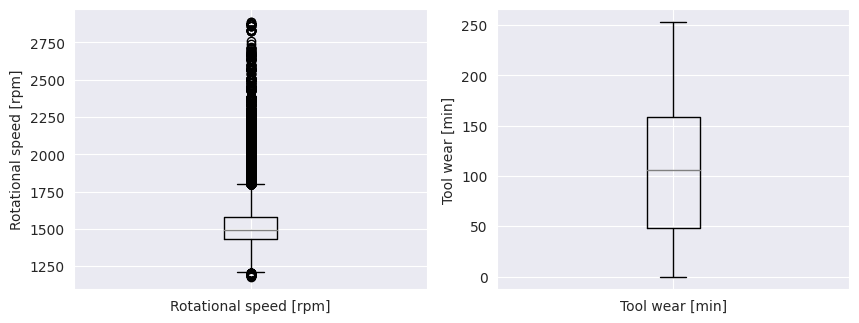

In [17]:
# Boxplots to visualize outliers
outlier_columns = ['Rotational speed [rpm]', 'Tool wear [min]']

def plot_outliers(outlier_columns):
    plt.figure(figsize=(10,8))
    
    for idx, column in enumerate(outlier_columns):
        plt.subplot(2, 2, idx+1)
        fig = df.boxplot(column=column)
        fig.set_ylabel(column)
        

plot_outliers(outlier_columns)

<a id="data_preprocessing"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6. Data Preparation and Preprocessing</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [18]:
X = df.drop(columns=['Machine failure'])
y = df['Machine failure']

<a id="ordinal_encoding"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.1. Ordinal Encoding</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [19]:
X.Type.value_counts()

Type
L    95354
M    32152
H     8923
Name: count, dtype: int64

In [20]:
mapping = X.Type.map({'H':0, 'M': 1, 'L': 2})
mapping_test = test_df.Type.map({'H':0, 'M': 1, 'L': 2})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type                     136429 non-null  object 
 1   Air temperature [K]      136429 non-null  float64
 2   Process temperature [K]  136429 non-null  float64
 3   Rotational speed [rpm]   136429 non-null  int64  
 4   Torque [Nm]              136429 non-null  float64
 5   Tool wear [min]          136429 non-null  int64  
 6   Machine failure          136429 non-null  int64  
 7   TWF                      136429 non-null  int64  
 8   HDF                      136429 non-null  int64  
 9   PWF                      136429 non-null  int64  
 10  OSF                      136429 non-null  int64  
 11  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 12.5+ MB


In [22]:
X['Type'] = mapping
test_df['Type'] = mapping_test

<a id="scale_numeric"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.2. Scale Numeric Columns</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_scaled = scaler.fit_transform(X)

In [26]:
test_df = scaler.transform(test_df)

<a id="split_data"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.3. Split Data into Training and Validation Set</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<a id="baseline"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7. Baseline Models</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<a id="evaluation_metrics"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.1. Define Model Evaluation Metrics</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [30]:
confusion_matrices = {}

In [31]:
def evaluate_model(model, X_val, y_val):
    # Make predictions
    y_pred = model.predict(X_val)

    # Calculate evaluation metrics
    confusion_mat = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    return confusion_mat, accuracy, precision, recall, f1

In [32]:
def metric_df(model, model_name):
    confusion_mat, *df = evaluate_model(model, X_val, y_val)
    
    confusion_matrices[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data = df, columns=['Accuracy','Precision','Recall', 'F1 Score'])
    model_metrics.insert(0, 'Model', model_name)
    
    return model_metrics

<a id="class_imbalance"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.2. Handling Class Imbalance: SMOTE and Tomek Links</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

In [35]:
X_train.shape

(109143, 11)

In [36]:
X_train_ns.shape

(214866, 11)

<a id="gbm_xgb_cat"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.3. LightGBM, XGBoost and CatBoost</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [37]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [38]:
predictions = []

In [39]:
def train_base_models(X, y):
    """Train untuned models on sampled and unsampled data 
    """
    base_models = [
        (LGBMClassifier(verbose=-1, random_state=42), 'LightGBM Classifier'),
        (XGBClassifier(n_jobs=-1, random_state=42), 'XGBoost Classifier'),
        (CatBoostClassifier(verbose=0, random_state=42), 'Categorical Boosting')
    ]
    
    for model, model_name in base_models:
        # Change model name to clarify whether it was trained on the sampled or unsampled data 
        if X.shape == X_train_ns.shape: 
            model_name += ' on Sampled Data' 
            
        model.fit(X, y)
        model_metrics = metric_df(model, model_name)
        predictions.append(model_metrics)

In [40]:
#  Train base models on unsample data
train_base_models(X_train, y_train)

In [41]:
#  Train base models on sample data
train_base_models(X_train_ns, y_train_ns)

<a id="base_models"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.4. Performance Comparison of base models</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [42]:
predictions_base = pd.concat(predictions, ignore_index=True, sort=False)
predictions_base = predictions_base.sort_values(by=['F1 Score'], ascending=False).style.hide(axis='index')

predictions_base

Model,Accuracy,Precision,Recall,F1 Score
Categorical Boosting,0.996042,0.976879,0.771689,0.862245
XGBoost Classifier,0.995859,0.962963,0.771689,0.856781
LightGBM Classifier,0.995822,0.962857,0.769406,0.855330
Categorical Boosting on Sampled Data,0.995162,0.904762,0.780822,0.838235
XGBoost Classifier on Sampled Data,0.994539,0.851582,0.799087,0.824499
LightGBM Classifier on Sampled Data,0.991681,0.712274,0.808219,0.757219


SMOTE in the mud 😂😂😂

<a id="optimization"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">8. Optimization: Hyperparameter Tuning</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy.optimize import minimize

In [44]:
test_preds = np.zeros(len(test_df))
cv = 0

In [45]:
# Create StratifiedKFold with 10 splits for cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [46]:
kf

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [47]:
# Create StratifiedKFold with 10 splits for cross-validation
n_splits = 2
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through each fold in the cross-validation
for fold, (train_idx, valid_idx) in enumerate(kf.split(X_train, y_train)):
#     print("-"*10 + ">" + f"Fold {fold+1}" + "<" + "-"*10)
#     print(fold)

    # Split the data into training and validation sets
    X1_train, X1_val = X_train[train_idx], X_train[valid_idx]
    y1_train, y1_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]
    
     # Create LightGBM model with predefined hyperparameters
    lgb = LGBMClassifier(n_estimators=10000, 
                         early_stopping_rounds=100, 
                         **{'max_depth': 7, 
                            'subsample': 0.5528027451731908, 
                            'colsample_bytree': 0.26714040676512085, 
                            'learning_rate': 0.11430358849370452})
    
    # Fit the LightGBM model on training data
    lgb.fit(X_train, y_train, eval_set=(X1_val, y1_val), verbose=0)
    
    # Make predictions on the validation set and test set
    lgb_preds = lgb.predict_proba(X1_val)[:,1]
    lgb_test_preds = lgb.predict_proba(test_df)[:,1]
    
    # Print ROC-AUC score on the validation set
    print(roc_auc_score(y1_val, lgb_preds))
    
    xgb = XGBClassifier(n_estimators=10000, 
                         early_stopping_rounds=100,
                        **{'max_depth': 12, 'subsample': 0.5549531235327668, 'colsample_bytree': 0.20335345531973037, 'learning_rate': 0.027251718255125106})
    
    xgb.fit(X_train, y_train, eval_set=[(X1_val, y1_val)], verbose=0)
     
    xgb_preds = xgb.predict_proba(X1_val)[:,1]
    xgb_test_preds = xgb.predict_proba(test_df)[:,1]
    
    print(roc_auc_score(y1_val, xgb_preds))
    
    meta_train = [lgb_preds, xgb_preds]
    meta_test = [lgb_test_preds, xgb_test_preds]

    def roc_auc(weights):
        fpred = np.zeros(len(meta_train[0]))
        for i, pred in enumerate(meta_train):
            fpred += weights[i] * pred

        return -roc_auc_score(y1_val, fpred)

    starting_values = [0.33]*len(meta_train) 
    cons = ({'type':'eq','fun':lambda w: 1-sum(w)})
    bounds = [(-1,1)]*len(meta_train) 
    res = minimize(roc_auc, starting_values, method='Nelder-Mead', bounds=bounds, constraints=cons)

    print(-res["fun"])
    
    cv -= res["fun"]
    
    for i, pred in enumerate(meta_test):
        test_preds += res["x"][i] * pred

print(f"CV: {cv/(fold+1)}")

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
0.9999985520826222
0.9999783901053028
0.9999985520826223
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
0.9999995536412208



KeyboardInterrupt



In [48]:
assert len(test_preds) == len(test_df)

In [49]:
submission_df['Machine failure'] = test_preds

In [50]:
submission_df.to_csv('submission.csv', index=False)

In [52]:
submission_df['Machine failure'] = test_preds / (fold+1)

<a id="performance_summary"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">9. Performance Comparison and Summary</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<a id="save_model"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">10. Save Model</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>